In [116]:
    #from sklearn.model_selection import train_test_split
#from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import PredictionErrorDisplay

from sklearn.decomposition import PCA

#from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', 70)

In [117]:
df_lens = pd.read_csv('C:/Users/elysi/Tele2_project/data/data_lens/DataLens_2nd_stage.csv', index_col= 0)

In [118]:
df_lens.shape

(3892, 20)

In [119]:
df_lens.head(5)

,h3_9,total_fit_clubs,total_fit_clubs_neighbour_and_hex,total_visits,salary_1_total_share,salary_2_total_share,salary_3_total_share,salary_4_total_share,salary_5_total_share,unique_visits,salary_1_unique_share,salary_2_unique_share,salary_3_unique_share,salary_4_unique_share,salary_5_unique_share,day_share,evening_share,morning_share,night_share,polygon_coords
0,8911060006bffff,0,0,147,0.248,0.301,0.203,0.113,0.135,98,0.341,0.176,0.141,0.153,0.188,0.320,0.272,0.190,0.218,"[[[59.781977675933426, 30.32268959593123], [59..."
1,89110600077ffff,0,0,250,0.145,0.182,0.234,0.257,0.182,99,0.230,0.149,0.230,0.207,0.184,0.460,0.216,0.144,0.180,"[[[59.787129538119395, 30.317411704884027], [5..."
2,89110600113ffff,4,4,333,0.216,0.197,0.206,0.222,0.159,144,0.326,0.202,0.171,0.155,0.147,0.444,0.153,0.252,0.150,"[[[59.80557695919295, 30.320486111127853], [59..."
3,89110600127ffff,0,0,1,0.000,0.000,0.000,0.000,0.000,1,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,"[[[59.813825841873694, 30.339520070205992], [5..."
4,89110600183ffff,0,0,16,0.067,0.200,0.600,0.000,0.133,7,0.167,0.167,0.333,0.000,0.333,0.562,0.062,0.312,0.062,"[[[59.8080474850324, 30.312455481917688], [59...."


<Axes: >

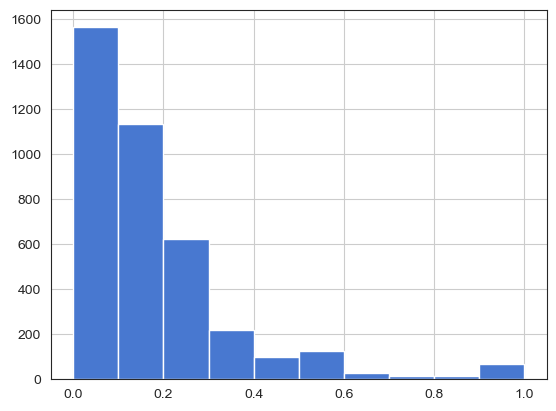

In [120]:
df_lens.salary_1_total_share.hist()

<Axes: >

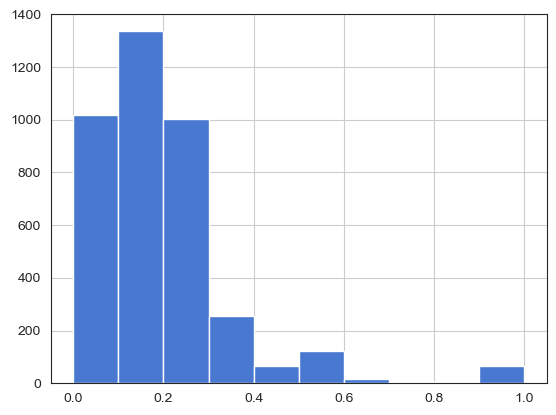

In [121]:
df_lens.salary_1_unique_share.hist()

In [122]:
df_lens['total_fit_clubs_only_neighbours'] = df_lens['total_fit_clubs_neighbour_and_hex'] - df_lens['total_fit_clubs']

In [123]:
df_lens = df_lens[['h3_9', 'polygon_coords',  'total_visits', 'unique_visits', 
                   'total_fit_clubs', 'total_fit_clubs_only_neighbours', 'total_fit_clubs_neighbour_and_hex',
       
                   'salary_1_total_share', 'salary_2_total_share', 'salary_3_total_share', 'salary_4_total_share', 'salary_5_total_share',
                   'salary_1_unique_share', 'salary_2_unique_share', 'salary_3_unique_share', 'salary_4_unique_share', 'salary_5_unique_share', 
                   'day_share', 'evening_share', 'morning_share', 'night_share']]

In [124]:
column_transform = ['total_visits', 'unique_visits', 
                   'total_fit_clubs', 'total_fit_clubs_only_neighbours', 'total_fit_clubs_neighbour_and_hex',
       
                   'salary_1_total_share', 'salary_2_total_share', 'salary_3_total_share', 'salary_4_total_share', 'salary_5_total_share',
                   'salary_1_unique_share', 'salary_2_unique_share', 'salary_3_unique_share', 'salary_4_unique_share', 'salary_5_unique_share', 
                   'day_share', 'evening_share', 'morning_share', 'night_share']

In [125]:
def create_top_columns(df, column_list):
    n_rows = df.shape[0]
    group_sizes = [39] * 92 + [38] * 8  # 92 groups of 39 and 8 groups of 38
    ranks = np.concatenate([np.full(size, rank + 1) for rank, size in enumerate(group_sizes)])

    df_copy = df.reset_index(drop=True).copy()  # Reset index for consistent ordering

    for col in column_list:
        # Sort values in descending order and get indices
        sorted_indices = np.argsort(-df_copy[col].values)
        
        # Create the new column with the '_top' prefix
        top_column_name = f"{col}_top"
        df_copy[top_column_name] = np.nan
        
        # Assign ranks based on sorted order
        df_copy.loc[sorted_indices, top_column_name] = ranks

    df_copy.index = df.index  # Restore original index
    return df_copy

In [126]:
df_lens = create_top_columns(df_lens, column_transform)

In [127]:
df_lens.shape

(3892, 40)

In [128]:
df_lens.head(5)

,h3_9,polygon_coords,total_visits,unique_visits,total_fit_clubs,total_fit_clubs_only_neighbours,total_fit_clubs_neighbour_and_hex,salary_1_total_share,salary_2_total_share,salary_3_total_share,salary_4_total_share,salary_5_total_share,salary_1_unique_share,salary_2_unique_share,salary_3_unique_share,salary_4_unique_share,salary_5_unique_share,day_share,evening_share,morning_share,night_share,total_visits_top,unique_visits_top,total_fit_clubs_top,total_fit_clubs_only_neighbours_top,total_fit_clubs_neighbour_and_hex_top,salary_1_total_share_top,salary_2_total_share_top,salary_3_total_share_top,salary_4_total_share_top,salary_5_total_share_top,salary_1_unique_share_top,salary_2_unique_share_top,salary_3_unique_share_top,salary_4_unique_share_top,salary_5_unique_share_top,day_share_top,evening_share_top,morning_share_top,night_share_top
0,8911060006bffff,"[[[59.781977675933426, 30.32268959593123], [59...",147,98,0,0,0,0.248,0.301,0.203,0.113,0.135,0.341,0.176,0.141,0.153,0.188,0.320,0.272,0.190,0.218,34,20,19,62,51,22,34,51,62,44,9,73,75,61,31,83,23,27,42
1,89110600077ffff,"[[[59.787129538119395, 30.317411704884027], [5...",250,99,0,0,0,0.145,0.182,0.234,0.257,0.182,0.230,0.149,0.230,0.207,0.184,0.460,0.216,0.144,0.180,31,20,68,75,76,45,62,42,24,32,28,78,44,35,32,40,48,43,54
2,89110600113ffff,"[[[59.80557695919295, 30.320486111127853], [59...",333,144,4,0,4,0.216,0.197,0.206,0.222,0.159,0.326,0.202,0.171,0.155,0.147,0.444,0.153,0.252,0.150,28,11,1,75,5,26,59,50,31,37,13,64,66,60,46,45,71,14,62
3,89110600127ffff,"[[[59.813825841873694, 30.339520070205992], [5...",1,1,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,96,94,69,75,76,84,85,82,89,84,80,88,86,89,83,4,88,90,84
4,89110600183ffff,"[[[59.8080474850324, 30.312455481917688], [59....",16,7,0,0,0,0.067,0.200,0.600,0.000,0.133,0.167,0.167,0.333,0.000,0.333,0.562,0.062,0.312,0.062,68,70,69,75,76,70,57,5,89,44,52,76,16,89,9,18,85,10,79


In [129]:
df_lens[df_lens['total_visits_top'] == 1]

,h3_9,polygon_coords,total_visits,unique_visits,total_fit_clubs,total_fit_clubs_only_neighbours,total_fit_clubs_neighbour_and_hex,salary_1_total_share,salary_2_total_share,salary_3_total_share,salary_4_total_share,salary_5_total_share,salary_1_unique_share,salary_2_unique_share,salary_3_unique_share,salary_4_unique_share,salary_5_unique_share,day_share,evening_share,morning_share,night_share,total_visits_top,unique_visits_top,total_fit_clubs_top,total_fit_clubs_only_neighbours_top,total_fit_clubs_neighbour_and_hex_top,salary_1_total_share_top,salary_2_total_share_top,salary_3_total_share_top,salary_4_total_share_top,salary_5_total_share_top,salary_1_unique_share_top,salary_2_unique_share_top,salary_3_unique_share_top,salary_4_unique_share_top,salary_5_unique_share_top,day_share_top,evening_share_top,morning_share_top,night_share_top
39,8911060082bffff,"[[[59.828049313767075, 30.396454206590253], [5...",2177,210,1,1,2,0.167,0.352,0.201,0.132,0.148,0.221,0.281,0.241,0.136,0.121,0.343,0.239,0.102,0.315,1,4,11,42,17,39,25,51,57,40,31,34,39,67,58,75,37,68,15
84,8911060097bffff,"[[[59.83886913175347, 30.412892771279804], [59...",1715,280,0,0,0,0.178,0.154,0.376,0.137,0.155,0.225,0.229,0.248,0.167,0.132,0.313,0.238,0.134,0.315,1,2,70,76,77,36,68,16,55,38,29,55,37,54,53,84,38,49,15
90,89110600997ffff,"[[[59.84887085927476, 30.386135431793917], [59...",1916,253,0,0,0,0.128,0.233,0.351,0.159,0.129,0.236,0.253,0.258,0.131,0.122,0.345,0.232,0.106,0.317,1,2,71,76,77,51,50,18,49,45,26,42,30,68,57,74,41,66,15
101,891106009d7ffff,"[[[59.84103760792077, 30.388656571658192], [59...",1773,213,0,1,1,0.147,0.385,0.236,0.156,0.076,0.179,0.295,0.263,0.158,0.105,0.346,0.251,0.111,0.292,1,4,69,24,37,45,21,42,50,62,48,30,29,59,63,74,31,63,20
178,89110600d67ffff,"[[[59.84351144948663, 30.38061769137097], [59....",1938,187,0,0,0,0.112,0.321,0.365,0.099,0.103,0.174,0.279,0.302,0.145,0.099,0.309,0.251,0.120,0.320,1,6,65,72,73,56,31,17,66,54,49,34,19,63,66,85,31,58,14
230,89110602523ffff,"[[[59.826915247366834, 30.20508472897441], [59...",1725,177,0,0,0,0.232,0.401,0.166,0.140,0.062,0.201,0.314,0.208,0.170,0.107,0.357,0.224,0.115,0.305,1,7,67,73,74,23,18,60,54,66,36,25,53,52,63,71,44,61,17
423,89110602c97ffff,"[[[59.84590178137579, 30.235055069618266], [59...",1697,178,0,0,0,0.249,0.284,0.230,0.112,0.125,0.233,0.245,0.270,0.145,0.107,0.321,0.214,0.132,0.332,1,6,71,77,79,22,38,43,62,47,27,48,27,63,63,82,49,50,13
558,8911060422bffff,"[[[59.90306980859689, 30.47389095148847], [59....",1699,197,1,0,1,0.204,0.215,0.196,0.195,0.190,0.186,0.282,0.215,0.169,0.147,0.334,0.227,0.111,0.328,1,5,8,78,35,29,54,53,38,29,44,34,50,52,46,77,43,62,13
575,89110604277ffff,"[[[59.900390733961096, 30.47111875779105], [59...",1917,232,0,1,1,0.228,0.242,0.130,0.175,0.226,0.255,0.288,0.173,0.144,0.139,0.327,0.268,0.095,0.310,1,3,58,32,35,24,48,67,43,22,20,31,66,63,51,81,25,71,16
576,8911060427bffff,"[[[59.895133336077755, 30.4709870205874], [59....",2002,186,1,0,1,0.293,0.266,0.228,0.152,0.061,0.281,0.263,0.210,0.174,0.072,0.358,0.245,0.105,0.293,1,6,8,78,35,16,42,44,51,66,17,39,52,51,71,70,35,66,20


**add clusters**

In [130]:
fitness_df = pd.read_csv('C:/Users/elysi/Tele2_project/data/df_lens_add.csv')

In [131]:
fitness_df.head(3)

,h3_9,total_fit_clubs_neighbour_2_hn,Clusters
0,8911060006bffff,0.0,4.0
1,89110600077ffff,0.0,4.0
2,89110600113ffff,4.0,4.0


In [132]:
fitness_df.Clusters.isnull()

0       False
1       False
2       False
3        True
4        True
        ...  
3887     True
3888     True
3889     True
3890     True
3891     True
Name: Clusters, Length: 3892, dtype: bool

In [133]:
df_lens = pd.merge(df_lens, fitness_df,
                                how='left', left_on='h3_9', right_on='h3_9')

In [134]:
df_lens.columns

Index(['h3_9', 'polygon_coords', 'total_visits', 'unique_visits',
       'total_fit_clubs', 'total_fit_clubs_only_neighbours',
       'total_fit_clubs_neighbour_and_hex', 'salary_1_total_share',
       'salary_2_total_share', 'salary_3_total_share', 'salary_4_total_share',
       'salary_5_total_share', 'salary_1_unique_share',
       'salary_2_unique_share', 'salary_3_unique_share',
       'salary_4_unique_share', 'salary_5_unique_share', 'day_share',
       'evening_share', 'morning_share', 'night_share', 'total_visits_top',
       'unique_visits_top', 'total_fit_clubs_top',
       'total_fit_clubs_only_neighbours_top',
       'total_fit_clubs_neighbour_and_hex_top', 'salary_1_total_share_top',
       'salary_2_total_share_top', 'salary_3_total_share_top',
       'salary_4_total_share_top', 'salary_5_total_share_top',
       'salary_1_unique_share_top', 'salary_2_unique_share_top',
       'salary_3_unique_share_top', 'salary_4_unique_share_top',
       'salary_5_unique_share_top', 'd

In [135]:
df_lens = df_lens.drop(['total_fit_clubs_neighbour_and_hex_top'], axis = 1)

In [136]:
rename_dict = {
    'total_fit_clubs_neighbour_2_hn': 'total_fit_clubs_neighbour_and_hex_top',
    'Clusters': 'cluster',

}

df_lens.rename(columns=rename_dict, inplace=True)

In [137]:
df_lens.head(3)

,h3_9,polygon_coords,total_visits,unique_visits,total_fit_clubs,total_fit_clubs_only_neighbours,total_fit_clubs_neighbour_and_hex,salary_1_total_share,salary_2_total_share,salary_3_total_share,salary_4_total_share,salary_5_total_share,salary_1_unique_share,salary_2_unique_share,salary_3_unique_share,salary_4_unique_share,salary_5_unique_share,day_share,evening_share,morning_share,night_share,total_visits_top,unique_visits_top,total_fit_clubs_top,total_fit_clubs_only_neighbours_top,salary_1_total_share_top,salary_2_total_share_top,salary_3_total_share_top,salary_4_total_share_top,salary_5_total_share_top,salary_1_unique_share_top,salary_2_unique_share_top,salary_3_unique_share_top,salary_4_unique_share_top,salary_5_unique_share_top,day_share_top,evening_share_top,morning_share_top,night_share_top,total_fit_clubs_neighbour_and_hex_top,cluster
0,8911060006bffff,"[[[59.781977675933426, 30.32268959593123], [59...",147,98,0,0,0,0.248,0.301,0.203,0.113,0.135,0.341,0.176,0.141,0.153,0.188,0.320,0.272,0.190,0.218,34,20,19,62,22,34,51,62,44,9,73,75,61,31,83,23,27,42,0.0,4.0
1,89110600077ffff,"[[[59.787129538119395, 30.317411704884027], [5...",250,99,0,0,0,0.145,0.182,0.234,0.257,0.182,0.230,0.149,0.230,0.207,0.184,0.460,0.216,0.144,0.180,31,20,68,75,45,62,42,24,32,28,78,44,35,32,40,48,43,54,0.0,4.0
2,89110600113ffff,"[[[59.80557695919295, 30.320486111127853], [59...",333,144,4,0,4,0.216,0.197,0.206,0.222,0.159,0.326,0.202,0.171,0.155,0.147,0.444,0.153,0.252,0.150,28,11,1,75,26,59,50,31,37,13,64,66,60,46,45,71,14,62,4.0,4.0


In [138]:
df_lens['cluster'] = df_lens['cluster'].replace(0, 'Residential district')
df_lens['cluster'] = df_lens['cluster'].replace(1, 'Business facilities')
df_lens['cluster'] = df_lens['cluster'].replace(2, 'Center')
df_lens['cluster'] = df_lens['cluster'].replace(3, 'Dormitories')
df_lens['cluster'] = df_lens['cluster'].replace(4, 'High rental costs')
df_lens.cluster = df_lens.cluster.fillna('Low visits')

In [139]:
df_lens['cluster'].value_counts()

Low visits              2557
Dormitories              441
Residential district     294
Center                   216
Business facilities      209
High rental costs        175
Name: cluster, dtype: int64

In [140]:
df_lens['cluster'].isnull().sum()

0

**save**

In [141]:
path = 'C:/Users/elysi/Tele2_project/data/data_lens/DataLens_final_diploma.csv'
df_lens.to_csv(path, index=False)